# Section 2


# Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix
import itertools

# Set random seed to ensure reproducible runs
RSEED = 50

# הערות חשובות
<li>הכנתי שני סטים של מידע, אחד עם נתוני ישובים בלבד והשני עם נתוני קלפי
<li>לפעמים הרצתי עם שני סטים שונים והשוויתי בין התוצאות (לדוגמה בסעיף 4)
<li>בסעיף 3 סט המידע שונה כי ניגשתי אליו בצורת שונה וחלקתי את המלפלגות לגושים במקום להתייחס ברמת מפלגות בודדות ואיחודים בין מפלגות
<li>הסימון B בשמות של המשתנים מתייחס לקבצים עם נתוני קלפי, והסימון C מתייחס לקבצים עם נתוני ישוב בלבד. המספרים 21,22,23 מסמלים את מספר מערכת הבחירות 


## Elections 21

In [2]:
df_b_21 = pd.read_csv("datasets/expb_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("Train data with localities and polling stations \n")
# print(df_b_21.shape)
# print(df_b_21.head())

X_b_21 = df_b_21.values


df_c_21 = pd.read_csv("datasets/expc_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("\n\nTrain data with localities only \n")
# print(df_c_21.shape)
# print(df_c_21.head())

X_c_21 = df_c_21.values

## Elections 22

In [3]:
# index_names={0:"Locality Name", 1:"Locality Code", 2:"Polling Num", 3:"BzB", 4:"Electors", 5:"Disqualified", 6:"Qualified", 
#              7:"..."}

# names_map={'שם ישוב':"Locality Name", 
#            'סמל ישוב':"Locality Code", 
#            'קלפי':"Polling Num", 
#            'בזב':"BzB", 
#            'מצביעים':"Electors", 
#            'פסולים':"Disqualified", 
#            'כשרים':"Qualified",
#           } 

df_b_22 = pd.read_csv("datasets/expb_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("Train data with localities and polling stations \n")
# print(df_b_22.shape)
# print(df_b_22.head())

X_b_22 = df_b_22.values


df_c_22 = pd.read_csv("datasets/expc_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("\n\nTrain data with localities only \n")
# print(df_c_22.shape)
# print(df_c_22.head())

X_c_22 = df_c_22.values



## Load Test Data - Elections 23

In [4]:
df_b_23 = pd.read_csv("datasets/expb_23.csv", encoding= 'Windows-1255') #.drop([''], axis=1)
df_b_23 = df_b_23.iloc[:, :-1] #removing empty column at the end
# print("Test data with localities and polling stations \n")
# print(df_b_23.shape)
# print(df_b_23.head())

X_test_polling = df_b_23.values
# X_test_polling = np.delete(X_test_polling,[2],1) # drop Locality name column
# print(X_test_polling)


# print("\n\nTest data with localities only \n")
df_c_23 = pd.read_csv("datasets/expc_23.csv", encoding= 'Windows-1255')
df_c_23 = df_c_23.iloc[:, :-1] #removing empty column at the end
# print(df_c_23.shape)
# print(df_c_23.head())

# X_test_locality = df_c_23.values
# X_test_locality = np.delete(X_test_locality,[2],1) # drop Locality name column
# print(X_test_locality)

Prepare a dictionary of party:code for all parties in elections round 21

In [5]:
# encoding_df = pd.read_excel("datasets/encoding_columns.xlsx", sheet_name='Sheet2', header=None)

# parties = index_df[0].tolist()
# encoding = index_df[1].tolist()

# # print(parties, encoding)

# parties_dict = dict(zip(parties, encoding))
# print(parties_dict)


parties = df_b_21.columns[7:] # columns names
# print(parties.shape)

columnsSet = set(parties)
print (len(columnsSet))
columnsSet.update(df_b_22.columns[11:])
print (len(columnsSet))
columnsSet.update(df_b_23.columns[11:])
print (len(columnsSet))

code2party = dict()
party2code = dict()

for v, k in enumerate(columnsSet,1):
    if k != '':
        code2party[v]= k
        party2code[k]= v
    
print(code2party)
print("\n",party2code)

43
56
60
{1: 'ין', 2: 'צן', 3: 'נק', 4: 'קך', 5: 'ר', 6: 'כף', 7: 'יץ', 8: 'מרצ', 9: 'קן', 10: 'ףנ', 11: 'ףי', 12: 'קץ', 13: 'כ', 14: 'נז', 15: 'יק', 16: 'ודעם', 17: 'ךק', 18: 'נר', 19: 'נץ', 20: 'ןך', 21: 'ץז', 22: 'ינ', 23: 'דעם', 24: 'פה', 25: 'י', 26: 'יף', 27: 'מחל', 28: 'אמת', 29: 'זנ', 30: 'שס', 31: 'ן', 32: 'זי', 33: 'זן', 34: 'יר', 35: 'זץ', 36: 'יז', 37: 'קף', 38: 'נך', 39: 'ףז', 40: 'ום', 41: 'ז', 42: 'צק', 43: 'ףך', 44: 'זכ', 45: 'ץ', 46: 'ק', 47: 'קי', 48: 'ץי', 49: 'רק', 50: 'זך', 51: 'ןנ', 52: 'כי', 53: 'כן', 54: 'צ', 55: 'ני', 56: 'טב', 57: 'ג', 58: 'ל', 59: 'ףץ', 60: 'נ'}

 {'ין': 1, 'צן': 2, 'נק': 3, 'קך': 4, 'ר': 5, 'כף': 6, 'יץ': 7, 'מרצ': 8, 'קן': 9, 'ףנ': 10, 'ףי': 11, 'קץ': 12, 'כ': 13, 'נז': 14, 'יק': 15, 'ודעם': 16, 'ךק': 17, 'נר': 18, 'נץ': 19, 'ןך': 20, 'ץז': 21, 'ינ': 22, 'דעם': 23, 'פה': 24, 'י': 25, 'יף': 26, 'מחל': 27, 'אמת': 28, 'זנ': 29, 'שס': 30, 'ן': 31, 'זי': 32, 'זן': 33, 'יר': 34, 'זץ': 35, 'יז': 36, 'קף': 37, 'נך': 38, 'ףז': 39, 'ום': 40, 'ז': 41,

In [6]:

names_map={'שם ישוב':"Locality Name", 
           'סמל ישוב':"Locality Code", 
           'מספר קלפי':"Polling Num", 
           'קלפי':"Polling Num",
           'בזב':"BzB", 
           'סמל ועדה':"committee code",
           'ברזל':"Barzel",
           'ריכוז':"Rikuz",
           'שופט':"Judge", 
           'מצביעים':"Voters",
           'פסולים':"Disqualified", 
           'כשרים':"Qualified",
          } 

df_b_21_encoded = df_b_21.rename(columns=party2code).rename(columns=names_map)
df_b_22_encoded = df_b_22.rename(columns=party2code).rename(columns=names_map)
df_b_23_encoded = df_b_23.rename(columns=party2code).rename(columns=names_map)

df_c_21_encoded = df_c_21.rename(columns=party2code).rename(columns=names_map)
df_c_22_encoded = df_c_22.rename(columns=party2code).rename(columns=names_map)
df_c_23_encoded = df_c_23.rename(columns=party2code).rename(columns=names_map)


In [7]:
df_b_21_encoded.head()

,Locality Name,Locality Code,Polling Num,BzB,Voters,Disqualified,Qualified,28,57,23,...,42,45,21,48,46,47,9,37,5,30
0,אבו ג'ווייעד (שבט),967,1.0,546,64,2,62,2,0,31,...,0,0,0,0,0,0,1,0,0,0
1,אבו ג'ווייעד (שבט),967,2.0,739,113,2,111,2,0,69,...,0,0,0,0,0,2,0,0,0,0
2,אבו ג'ווייעד (שבט),967,3.0,630,98,1,97,1,0,75,...,0,0,0,0,0,0,0,0,0,0
3,אבו גוש,472,1.0,518,197,6,191,4,0,36,...,0,1,0,0,1,0,0,0,0,1
4,אבו גוש,472,2.0,679,290,3,287,7,0,69,...,0,0,0,0,0,0,0,1,0,2


In [8]:
df_c_21_encoded.head()

,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,28,57,23,40,...,42,45,21,48,46,47,9,37,5,30
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,0,0,0,0,0,33
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,0,0,0,0,0,73
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,0,0,0,3,0,0,0,0,2
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,0,0,0,0,0,25


In [9]:
df_b_22_encoded.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,24,39,54,2,45,46,4,12,49,30
0,18,9797,אבו ג'ווייעד (שבט),967,1.0,1,0,559,113,2,...,9,0,0,0,0,1,0,0,0,0
1,18,9798,אבו ג'ווייעד (שבט),967,2.0,1,0,751,224,1,...,12,0,0,0,0,1,1,0,0,0
2,18,9799,אבו ג'ווייעד (שבט),967,3.0,1,0,651,205,6,...,1,0,0,0,0,1,0,0,0,0
3,2,733,אבו גוש,472,1.0,1,0,525,268,3,...,25,0,1,0,0,0,0,0,0,5
4,2,734,אבו גוש,472,2.0,1,0,686,363,6,...,33,0,0,0,0,2,1,0,0,6


In [10]:
df_c_22_encoded.head()

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,28,57,16,...,24,39,54,2,45,46,4,12,49,30
0,17,שחר,7,517,377,0,377,31,8,0,...,98,0,0,0,0,0,0,0,0,39
1,2,תירוש,10,332,245,0,245,1,4,0,...,6,0,0,0,0,0,0,0,0,104
2,17,"ניר ח""ן",11,406,287,0,287,32,1,1,...,94,0,0,0,0,0,0,0,0,4
3,18,חצבה,13,502,373,0,373,24,2,0,...,216,0,0,0,0,2,0,0,0,1
4,17,נועם,15,308,228,1,227,1,4,0,...,13,0,0,0,0,0,0,0,0,36


In [11]:
df_b_23_encoded.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,19,3,24,39,45,46,47,4,12,30
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,0,6,1,0,0,0,0,0,2
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,0,0,0,0,0,0,0,2,0
2,18,9872,אבו גווייעד שבט,967,3.0,1,0,669,220,2,...,0,0,2,1,0,0,0,0,0,0
3,2,736,אבו גוש,472,1.0,1,0,530,299,7,...,0,0,11,0,0,0,0,0,0,2
4,2,737,אבו גוש,472,2.0,1,0,693,388,6,...,0,0,18,0,0,0,0,0,1,0


In [12]:
df_c_23_encoded.head()

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,28,57,16,...,19,3,24,39,45,46,47,4,12,30
0,18,אבו גווייעד שבט,967,2018,595,6,589,13,0,554,...,0,0,8,2,0,0,0,0,2,2
1,2,אבו גוש,472,4821,2718,36,2682,75,4,2157,...,3,2,123,0,2,0,0,1,4,14
2,6,אבו סנאן,473,9422,6090,53,6037,92,6,4458,...,3,3,752,0,2,2,1,2,4,247
3,18,אבו עבדון שבט,958,142,41,1,40,0,0,40,...,0,0,0,0,0,0,0,0,0,0
4,18,אבו קורינאת שבט,968,3037,1336,8,1328,9,0,1263,...,1,0,33,0,2,1,0,2,1,0


Deal with unions and different parties letters

In [13]:
mapper = dict()
mapper[party2code["ןך"]] = [party2code["יף"]]
mapper[party2code["יז"]] = [party2code["יק"]]
mapper[party2code["ןנ"]] = [party2code["יר"]]
mapper[party2code["ז"]] = [party2code["זן"]]
mapper[party2code["אמת"]] = [party2code["אמת"], party2code["מרצ"], party2code["נר"]]
mapper[party2code["ודעם"]] = [party2code["דעם"], party2code["ום"]]
mapper

{20: [26], 36: [15], 51: [34], 41: [33], 28: [28, 8, 18], 16: [23, 40]}

In [14]:
mapper2 = dict()
mapper2[party2code["קץ"]] = [party2code["ני"]]
mapper2[party2code["י"]] = [party2code["יר"]]
mapper2[party2code["ץ"]] = [party2code["כן"]]
mapper2[party2code["נ"]] = [party2code["נק"]]
mapper2[party2code["אמת"]] = [party2code["אמת"], party2code["מרצ"]] #TODO
mapper2

{12: [55], 25: [34], 45: [53], 60: [3], 28: [28, 8]}

In [15]:
mapper3 = dict()
mapper3[party2code["ינ"]] = [party2code["ין"]]
mapper3[party2code["נץ"]] = [party2code["כף"]]
mapper3

{22: [1], 19: [6]}

In [16]:
def handle_unions(mapper, table):
    for k,v in mapper.items():
        if(len(v) > 1):
            col = table[v[0]]
            for i in range(1,len(v)):
                col += table[v[i]]
            for item in v:
                table = table.drop(item,axis=1)
            
            table[k] = col
        else:
            table.rename(columns={k:v[0]}, inplace=True)
    return table

In [17]:
df_b_21_unioned = handle_unions(mapper, df_b_21_encoded)
print(df_b_21_unioned.columns.shape)
# df_b_21_unioned.columns

(47,)


In [18]:
df_c_21_unioned = handle_unions(mapper, df_c_21_encoded)
print(df_c_21_unioned.columns.shape)
# df_c_21_unioned.columns

(46,)


In [19]:
df_b_22_unioned = handle_unions(mapper2, df_b_22_encoded)
print(df_b_22_unioned.columns.shape)
# df_b_22_unioned.columns

(42,)


In [20]:
df_c_22_unioned = handle_unions(mapper2, df_c_22_encoded)
print(df_c_22_unioned.columns.shape)
# df_c_22_unioned.to_csv("test22.csv")

(38,)


In [21]:
df_b_23_unioned = handle_unions(mapper3, df_b_23_encoded)
print(df_b_23_unioned.columns.shape)
# df_b_23_unioned.columns

(41,)


In [22]:
df_c_23_unioned = handle_unions(mapper3, df_c_23_encoded)
print(df_c_23_unioned.columns.shape)
# df_c_23_unioned.columns

(37,)


In [23]:
def handle_empty_columns(size, value):
    if value is not None:
        return value
    else:
        return [0]*size

## 1) Data with locality and polling numbers

table1 = dict()
table2 = dict()
table3 = dict()

# print(df_b_23_unioned.columns[:11])
for x in df_b_23_unioned.columns[:11]: # non-parties columns 
    table1[x] = handle_empty_columns(df_b_21_unioned.shape[0], df_b_21_unioned.get(x))
    table2[x] = handle_empty_columns(df_b_22_unioned.shape[0], df_b_22_unioned.get(x))
    table3[x] = handle_empty_columns(df_b_23_unioned.shape[0], df_b_23_unioned.get(x))

for x in code2party.keys(): # parties columns
    table1[x] = handle_empty_columns(df_b_21_unioned.shape[0], df_b_21_unioned.get(x))
    table2[x] = handle_empty_columns(df_b_22_unioned.shape[0], df_b_22_unioned.get(x))
    table3[x] = handle_empty_columns(df_b_23_unioned.shape[0], df_b_23_unioned.get(x))
    
# print(table1)
# print(table2)
# print(table3)


## 2) Data with localities only

table1_c = dict()
table2_c = dict()
table3_c = dict()

# print(df_c_22_unioned.columns[:7])
for x in df_c_23_unioned.columns[:7]: # non-parties columns 
    table1_c[x] = handle_empty_columns(df_c_21_unioned.shape[0], df_c_21_unioned.get(x))
    table2_c[x] = handle_empty_columns(df_c_22_unioned.shape[0], df_c_22_unioned.get(x))
    table3_c[x] = handle_empty_columns(df_c_23_unioned.shape[0], df_c_23_unioned.get(x))

for x in code2party.keys(): # parties columns
    table1_c[x] = handle_empty_columns(df_c_21_unioned.shape[0], df_c_21_unioned.get(x))
    table2_c[x] = handle_empty_columns(df_c_22_unioned.shape[0], df_c_22_unioned.get(x))
    table3_c[x] = handle_empty_columns(df_c_23_unioned.shape[0], df_c_23_unioned.get(x))

In [24]:
df_b_21_final = pd.DataFrame(table1)
print("אמת", df_b_21_final[party2code["אמת"]].head(1)) # check point for data
df_b_21_final.head(2)

אמת 0    6
Name: 28, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,0,0,אבו ג'ווייעד (שבט),967,1.0,0,0,546,64,2,...,0,0,0,0,0,0,0,0,1,0
1,0,0,אבו ג'ווייעד (שבט),967,2.0,0,0,739,113,2,...,0,0,0,0,0,0,0,0,0,3


In [25]:
df_c_21_final = pd.DataFrame(table1_c)
print("אמת", df_c_21_final[party2code["אמת"]].head(1)) # check point for data
df_c_21_final.head(2)

אמת 0    35
Name: 28, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,0,שחר,7,516,371,0,371,0,0,0,...,0,0,0,0,0,3,2,5,0,23
1,0,תירוש,10,333,237,2,235,0,0,0,...,0,0,0,0,0,10,3,0,0,4


In [26]:
df_b_22_final = pd.DataFrame(table2)
print("אמת", df_b_22_final[party2code["אמת"]].head(1)) # check point for data
df_b_22_final.head(2)

אמת 0    0
Name: 28, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,18,9797,אבו ג'ווייעד (שבט),967,1.0,1,0,559,113,2,...,0,0,0,0,0,0,1,0,0,0
1,18,9798,אבו ג'ווייעד (שבט),967,2.0,1,0,751,224,1,...,0,2,0,0,0,0,0,0,0,0


In [27]:
df_c_22_final = pd.DataFrame(table2_c)
print("אמת", df_c_22_final[party2code["אמת"]].head(1)) # check point for data
df_c_22_final.head(2)

אמת 0    44
Name: 28, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,17,שחר,7,517,377,0,377,0,0,0,...,0,0,0,0,0,28,8,11,0,0
1,2,תירוש,10,332,245,0,245,0,0,0,...,0,0,0,0,0,11,4,0,0,0


In [28]:
df_b_23_final = pd.DataFrame(table3)
print("", df_b_22_final[party2code["אמת"]].head(1)) # check point for data
df_b_23_final.head(2)

 0    0
Name: 28, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,0,0,0,0,0,0,0,0,0
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,0,1,0,0,0,0,0,0,0


In [29]:
df_c_23_final = pd.DataFrame(table3_c)
print("", df_c_23_final[party2code["אמת"]].head(1)) # check point for data
df_c_23_final.head(2)

 0    13
Name: 28, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,18,אבו גווייעד שבט,967,2018,595,6,589,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2,אבו גוש,472,4821,2718,36,2682,5,0,2,...,0,0,0,0,0,5,4,5,0,0


## בין מפלגות Correlation

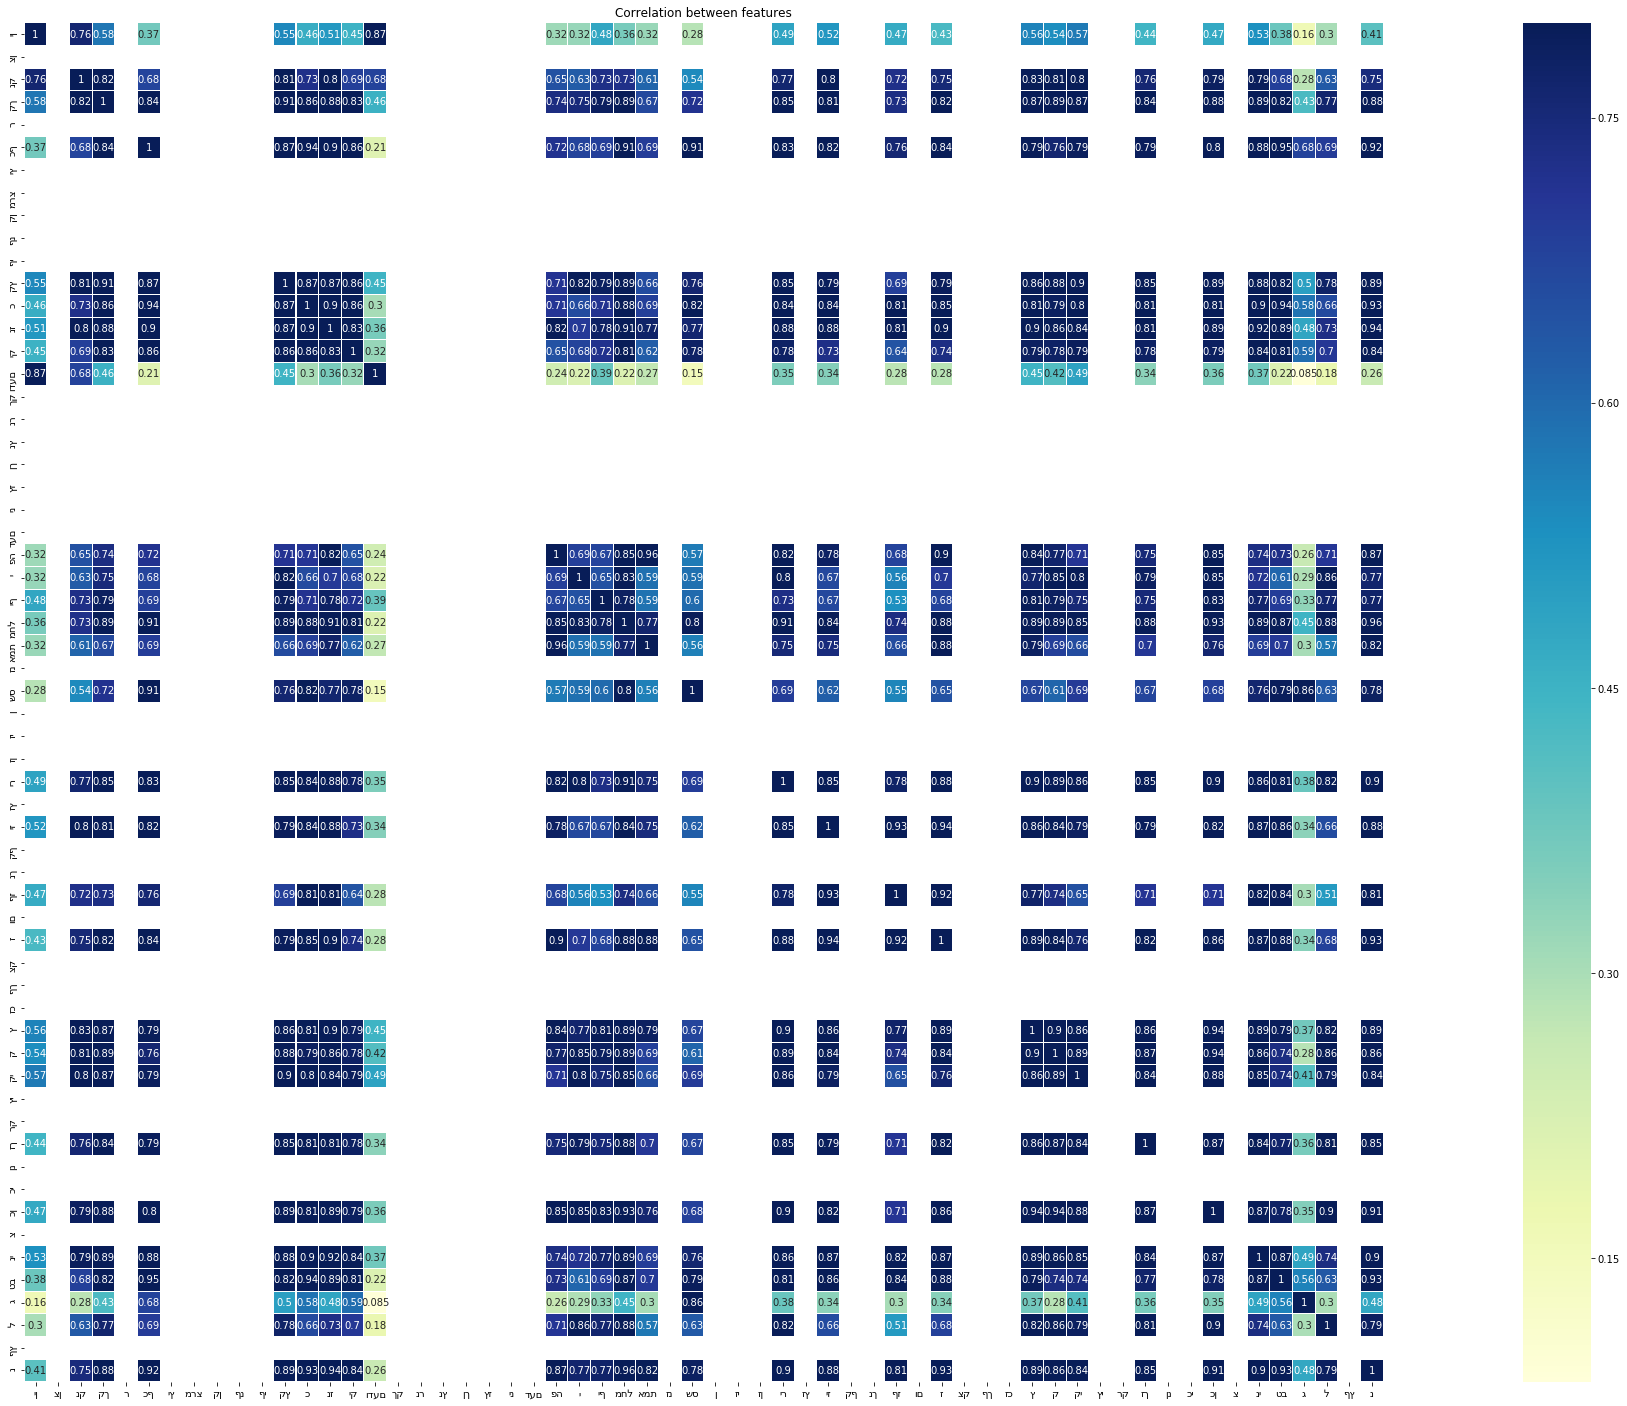

In [64]:
filteredDF = df_c_23_final.iloc[:,7:df_c_23_final.columns.size].rename(columns=code2party)
corrMatrix = filteredDF.corr()
# plt.figure(figsize=(19, 10))
plt.rcParams["figure.figsize"] = [50,25]
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## הערות
תציגי שמות במקום מספרים
תנתחי איפה את רואה קורלציה יותר טובה/גבוהה. מפלגות ימין-ימין, מפלגות ימין-מרכז או שמאל-מרכז למשל

# Qualified votes in : Ayalet Hashachar ,Eilat ,Haifa ,Kazrin ,Sakhnin


In [66]:
##final_result = pd.concat([df_c_21_final, df_c_22_final, df_c_23_final], axis=0)
filtered_result = df_c_21_final.loc[df_c_21_final['Locality Name'].isin(['קצרין', "סח'נין", 'אילת', 'איילת השחר', 'חיפה'])] 
filtered_result.head(5)

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
47,0,איילת השחר,77,812,595,1,594,0,0,0,...,0,0,0,0,0,3,3,2,1,8
999,0,אילת,2600,50304,22851,168,22683,1,0,0,...,0,0,0,0,0,507,103,1221,3,562
1136,0,חיפה,4000,247866,145606,1028,144578,21,0,0,...,0,0,0,0,0,3016,5210,10553,16,3320
1160,0,קצרין,4100,6040,3565,38,3527,0,0,0,...,0,0,0,0,0,227,7,552,0,145
1190,0,סח'נין,7500,21019,17106,84,17022,4,0,0,...,0,0,0,0,0,3,14,4,0,7


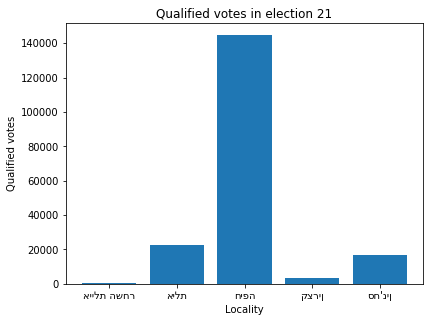

In [68]:
fig = plt.figure(figsize=(6.4,4.8))
plt.bar(filtered_result['Locality Name'], filtered_result['Qualified'])
plt.xlabel('Locality')
plt.ylabel('Qualified votes')
plt.title('Qualified votes in election 21')
plt.show()

In [65]:
filtered_result = df_c_22_final.loc[df_c_22_final['Locality Name'].isin(['קצרין', "סח'נין", 'אילת', 'איילת השחר', 'חיפה'])] 
filtered_result.head(5)

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
47,3,איילת השחר,77,814,567,1,566,0,0,1,...,0,0,0,0,1,6,3,29,0,0
999,18,אילת,2600,50539,22840,125,22715,0,4,8,...,0,3,6,4,6,917,280,1836,0,0
1136,7,חיפה,4000,248570,144888,846,144042,0,25,36,...,0,42,29,75,34,5586,5629,17177,0,0
1160,3,קצרין,4100,6052,3468,28,3440,0,7,4,...,0,0,0,3,1,344,27,660,0,0
1190,6,סח'נין,7500,20567,14829,185,14644,0,3,1,...,0,122,1,1,5,8,21,20,0,0


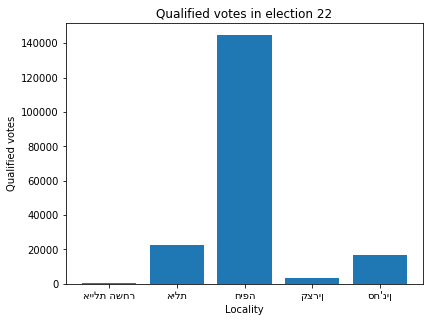

In [70]:
fig = plt.figure(figsize=(6.4,4.8))
plt.bar(filtered_result['Locality Name'], filtered_result['Qualified'])
plt.xlabel('Locality')
plt.ylabel('Qualified votes')
plt.title('Qualified votes in election 22')
plt.show()

In [71]:
filtered_result = df_c_23_final.loc[df_c_23_final['Locality Name'].isin(['קצרין', 'סחנין', 'אילת', 'איילת השחר', 'חיפה'])] 
filtered_result.head(5)

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
59,3,איילת השחר,77,818,587,2,585,0,0,0,...,0,0,0,0,1,11,2,20,0,0
63,18,אילת,2600,50714,22754,118,22636,1,0,2,...,0,0,6,0,1,728,185,1605,0,16
406,7,חיפה,4000,249627,145488,863,144625,10,0,17,...,0,0,41,0,13,5020,5604,14893,0,94
870,6,סחנין,7500,21624,17136,51,17085,8,0,5,...,0,0,3,0,1,1,9,4,0,1
1035,3,קצרין,4100,6175,3523,25,3498,1,0,0,...,0,0,1,0,0,343,53,663,0,2


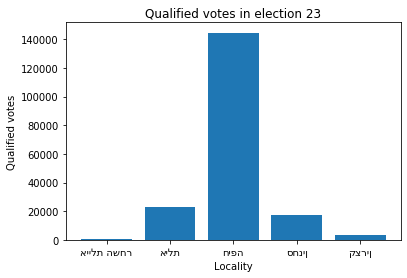

In [36]:
fig = plt.figure(figsize=(6.4,4.8))
plt.bar(filtered_result['Locality Name'], filtered_result['Qualified'])
plt.xlabel('Locality')
plt.ylabel('Qualified votes')
plt.title('Qualified votes in election 23')
plt.show()

## הערה
היה לך עוד גרף שמראה את כולם בגרף אחד עם צבעים שונים, איפה הוא?!

# Number of voters for parties: "מחל", "ודעם" and "פה" in Jerusalem, Bnei Brak, Sakhnin, Carmiel, and Daliyat al-Carmel

In [37]:
temp_df = df_c_21_final.loc[df_c_21_final['Locality Name'].isin(['ירושלים', 'סחנין', 'בני ברק', 'דאלית אלכרמל', 'כרמיאל'])] 
filtered_result = temp_df[["Locality Code","Locality Name", "Voters", "Qualified", "Disqualified", party2code["מחל"],party2code["ודעם"],party2code["פה"]]]
filtered_result.head(5)

,Locality Code,Locality Name,Voters,Qualified,Disqualified,27,16,24
757,1139,כרמיאל,24970,24711,259,8038,232,6557
1010,3000,ירושלים,262103,260049,2054,64380,2147,30576
1176,6100,בני ברק,84202,82804,1398,4431,16,1019


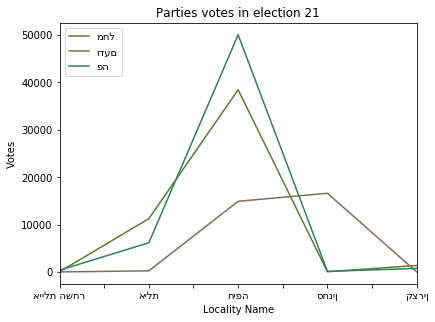

In [74]:
# gca stands for 'get current axis'
fig = plt.figure(figsize=(6.4,4.8))
ax = plt.gca()

filtered_result.plot(kind='line',x='Locality Name',y=party2code["מחל"], color='#557f2d', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["ודעם"], color='#7f6d5f', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["פה"], color='#2d7f5e', ax=ax)
plt.ylabel('Votes')
plt.title('Parties votes in election 21')
plt.legend(['מחל', 'ודעם', 'פה'], loc='upper left')
plt.show()

In [39]:
temp_df = df_c_22_final.loc[df_c_22_final['Locality Name'].isin(['ירושלים', 'סחנין', 'בני ברק', 'דאלית אלכרמל', 'כרמיאל'])] 
filtered_result = temp_df[["Locality Code","Locality Name", "Voters", "Qualified", "Disqualified", party2code["מחל"],party2code["ודעם"],party2code["פה"]]]
filtered_result.head(5)

,Locality Code,Locality Name,Voters,Qualified,Disqualified,27,16,24
757,1139,כרמיאל,24549,24316,233,7569,348,6490
1010,3000,ירושלים,261817,259977,1840,59798,3582,30553
1176,6100,בני ברק,85032,83928,1104,4027,16,1129


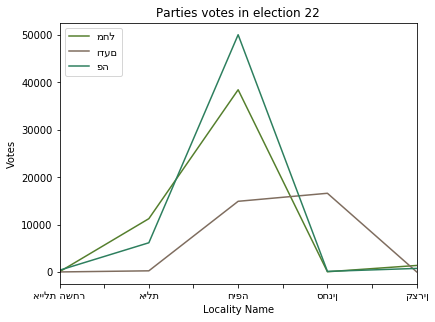

In [75]:
# gca stands for 'get current axis'
fig = plt.figure(figsize=(6.4,4.8))
ax = plt.gca()

filtered_result.plot(kind='line',x='Locality Name',y=party2code["מחל"], color='#557f2d', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["ודעם"], color='#7f6d5f', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["פה"], color='#2d7f5e', ax=ax)
plt.ylabel('Votes')
plt.title('Parties votes in election 22')
plt.legend(['מחל', 'ודעם', 'פה'], loc='upper left')
plt.show()

In [41]:
temp_df = df_c_23_final.loc[df_c_23_final['Locality Name'].isin(['ירושלים', 'סחנין', 'בני ברק', 'דאלית אלכרמל', 'כרמיאל'])] 
filtered_result = temp_df[["Locality Code","Locality Name", "Voters", "Qualified", "Disqualified", party2code["מחל"],party2code["ודעם"],party2code["פה"]]]
filtered_result.head(5)

,Locality Code,Locality Name,Voters,Qualified,Disqualified,27,16,24
196,6100,בני ברק,85775,84846,929,4951,22,1133
321,494,דאלית אלכרמל,7150,7102,48,407,650,5200
494,3000,ירושלים,263214,261589,1625,72601,5321,32800
607,1139,כרמיאל,24537,24370,167,8879,468,6627
870,7500,סחנין,17136,17085,51,39,16610,120


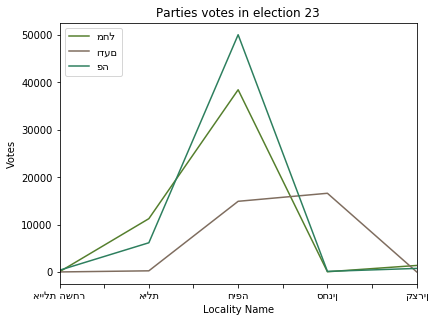

In [76]:
# gca stands for 'get current axis'
fig = plt.figure(figsize=(6.4,4.8))
ax = plt.gca()

filtered_result.plot(kind='line',x='Locality Name',y=party2code["מחל"], color='#557f2d', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["ודעם"], color='#7f6d5f', ax=ax)
filtered_result.plot(kind='line',x='Locality Name',y=party2code["פה"], color='#2d7f5e', ax=ax)
plt.ylabel('Votes')
plt.title('Parties votes in election 23')
plt.legend(['מחל', 'ודעם', 'פה'], loc='upper left')
plt.show()

# The highest 10 localities with Disqualified number of votes in each election 

In [43]:
sorted_df = df_c_21_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
1010,0,ירושלים,3000,410258,262103,2054,260049,10,0,0,...,0,0,0,0,0,17662,60632,4054,41,11599
1213,0,מעטפות חיצוניות,99999,0,240783,1961,238822,21,0,0,...,0,0,0,0,0,10822,8070,4637,29,10645
1176,0,בני ברק,6100,109000,84202,1398,82804,3,0,0,...,0,0,0,0,0,1900,51178,318,26,502
1174,0,תל אביב - יפו,5000,426398,268795,1194,267601,5,0,0,...,0,0,0,0,0,2899,2397,3687,18,5251
42,0,אשדוד,70,177630,117488,1107,116381,3,0,0,...,0,0,0,0,0,1869,13606,14410,11,2539
1136,0,חיפה,4000,247866,145606,1028,144578,21,0,0,...,0,0,0,0,0,3016,5210,10553,16,3320
1204,0,באר שבע,9000,161391,98993,970,98023,1,0,0,...,0,0,0,0,0,2774,1275,9312,18,4489
1194,0,פתח תקווה,7900,189414,131617,880,130737,4,0,0,...,0,0,0,0,0,7885,5676,7431,17,6203
1189,0,נתניה,7400,181085,109241,818,108423,7,0,0,...,0,0,0,0,0,3631,3186,7332,23,3360
1181,0,חולון,6600,157915,101653,733,100920,2,0,0,...,0,0,0,0,0,1608,1030,4299,11,2168


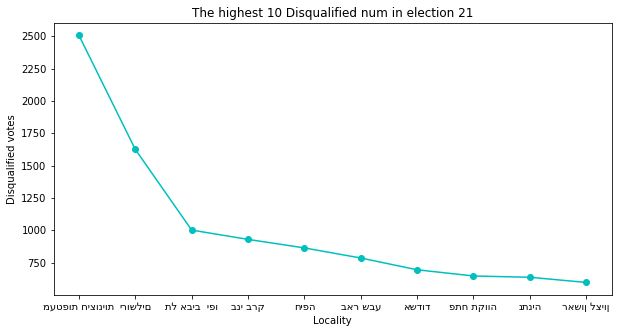

In [83]:
#plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified num in election 21')
plt.show()

In [45]:
sorted_df = df_c_22_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
1213,99,מעטפות חיצוניות,9999,0,282442,2226,280216,0,71,62,...,0,125,73,562,67,24810,11649,14019,0,0
1010,1,ירושלים,3000,413140,261817,1840,259977,0,8,43,...,0,22,27,89,23,23722,64937,7912,0,0
1176,15,בני ברק,6100,110049,85032,1104,83928,0,3,6,...,0,2,3,10,4,1295,51433,552,0,0
1174,14,תל אביב - יפו,5000,430203,267322,979,266343,0,12,41,...,0,27,32,122,29,6985,2934,11827,0,0
1136,7,חיפה,4000,248570,144888,846,144042,0,25,36,...,0,42,29,75,34,5586,5629,17177,0,0
1204,18,באר שבע,9000,161591,97425,816,96609,0,7,49,...,0,28,9,79,15,4826,1216,13495,0,0
42,17,אשדוד,70,178302,116800,808,115992,0,2,32,...,0,21,11,88,18,3689,13627,20902,0,0
1202,6,שפרעם,8800,28773,17039,712,16327,0,2,3,...,0,106,4,3,5,15,6,1732,0,0
1197,13,ראשון לציון,8300,206016,137633,655,136978,0,7,42,...,0,19,8,148,20,4928,1225,15223,0,0
1189,10,נתניה,7400,182945,108350,651,107699,0,12,41,...,0,28,17,204,24,6352,3543,11709,0,0


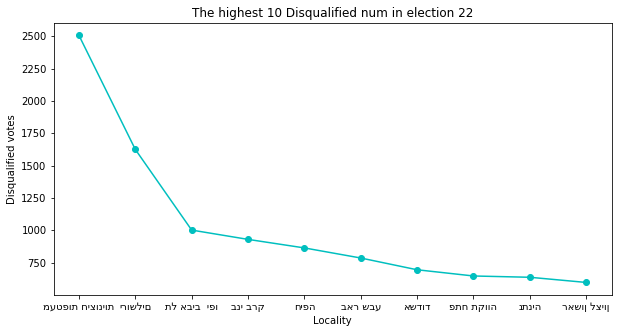

In [84]:
#plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified num in election 22')
plt.show()

In [47]:
sorted_df = df_c_23_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
712,99,מעטפות חיצוניות,9999,0,330209,2507,327702,36,0,46,...,0,0,58,0,37,27357,13387,12815,0,266
494,1,ירושלים,3000,415991,263214,1625,261589,10,0,12,...,0,0,25,0,21,20701,63782,6183,0,183
1189,14,תל אביב יפו,5000,434208,268116,1001,267115,6,0,16,...,0,0,37,0,10,5942,2802,8598,0,134
196,15,בני ברק,6100,111344,85775,929,84846,1,0,1,...,0,0,2,0,4,1200,51922,469,0,7
406,7,חיפה,4000,249627,145488,863,144625,10,0,17,...,0,0,41,0,13,5020,5604,14893,0,94
129,18,באר שבע,9000,161968,100051,785,99266,2,0,9,...,0,0,24,0,7,4442,1360,11804,0,76
114,17,אשדוד,70,179046,118313,694,117619,4,0,11,...,0,0,27,0,7,3124,13731,19414,0,54
989,11,פתח תקווה,7900,191908,132135,646,131489,1,0,10,...,0,0,28,0,11,11937,6346,11421,0,104
861,10,נתניה,7400,184613,110399,636,109763,3,0,15,...,0,0,25,0,10,5172,3602,10288,0,78
1058,13,ראשון לציון,8300,207038,138490,596,137894,2,0,8,...,0,0,25,0,6,4424,1166,12502,0,88


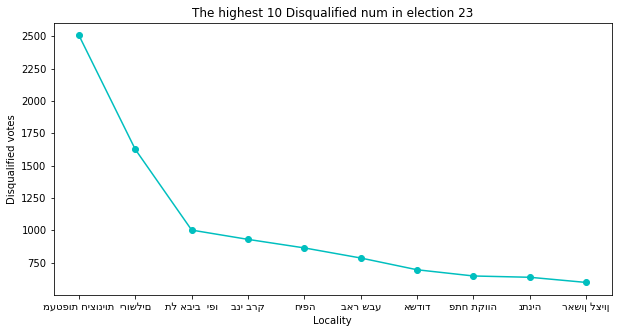

In [85]:

fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified num in election 23')
plt.show()

Union 21 + 22 results for training and validation

In [49]:
df_train_polling = pd.concat([df_b_21_final, df_b_22_final], axis=0)
df_train_polling.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,0,0,אבו ג'ווייעד (שבט),967,1.0,0,0,546,64,2,...,0,0,0,0,0,0,0,0,1,0
1,0,0,אבו ג'ווייעד (שבט),967,2.0,0,0,739,113,2,...,0,0,0,0,0,0,0,0,0,3
2,0,0,אבו ג'ווייעד (שבט),967,3.0,0,0,630,98,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,אבו גוש,472,1.0,0,0,518,197,6,...,0,0,0,0,0,1,0,0,0,0
4,0,0,אבו גוש,472,2.0,0,0,679,290,3,...,0,0,0,0,0,2,0,2,0,0


## המידע נלקח עבור הקלסטרינג רק משתי מערכות הבחירות 21 ו-22

Grouping parties by blocks (Right, Center, Left) - Election 21

In [50]:
groupby_dict = {
                'נ':'Right Block', 
                'ז':'Right Block',
                'זך':'Right Block',
                'ל':'Right Block',
                'ג':'Right Block', 
                'ףץ':'Right Block',
                'קי':'Right Block',
                'יץ':'Right Block',
                'יז':'Right Block',
                'כ':'Right Block',
                'מחל':'Right Block',
                'זץ':'Right Block',
                'טב':'Right Block',
                'שס':'Right Block',
                'זנ':'Right Block',
    
                'ץ':'Center Block',
                'קן':'Center Block',
                'נץ':'Center Block',
                'קף':'Center Block',
                'נר':'Center Block',
                'ץי':'Center Block',
                'פה':'Center Block',
                'זי':'Center Block',
                'ףך':'Center Block',
                'ךק':'Center Block',
    
                'ן':'Left Block',
                'ין':'Left Block',
                'ק':'Left Block',
                'צק':'Left Block',
                'י':'Left Block',
                'ףז':'Left Block',
                'ףי':'Left Block',
                'ןנ':'Left Block',
                'נז':'Left Block',
                'ןך':'Left Block',
                'ףנ':'Left Block',
                'ץז':'Left Block',
                'ר':'Left Block',
                'אמת':'Left Block',
                'נך':'Left Block',
                'מרץ':'Left Block',
                'דעם':'Left Block',
                'ום':'Left Block'
               }

df_blocks_21 = df_c_21.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_21 = pd.concat([df_c_21.iloc[:,[1]], df_blocks_21], axis=1)
print(result_21.shape)
result_21.head()

(1214, 4)


,סמל ישוב,Center Block,Left Block,Right Block
0,7,108,17,237
1,10,6,4,224
2,11,123,21,134
3,13,258,47,81
4,15,7,1,207


Grouping parties by blocks (Right, Center, Left) - Election 22

In [51]:

groupby_dict = {
                'ג':'Right Block', 
                'הי':'Right Block',
                'הפ':'Right Block',
                'ז':'Right Block',
                'זך':'Right Block', 
                'טב':'Right Block',
                'כף':'Right Block',
                'ל':'Right Block',
                'מחל':'Right Block',
                'שס':'Right Block',
    
                'יק':'Center Block',
                'כ':'Center Block',
                'כן':'Center Block',
                'נ':'Center Block',
                'ני':'Center Block',
                'נץ':'Center Block',
                'פה':'Center Block',
                'פנ':'Center Block',
                'צ':'Center Block',
    
                'אמת':'Left Block',
                'הק':'Left Block',
                'ודעם':'Left Block',
                'מרץ':'Left Block',
                'נק':'Left Block',
                'ףז':'Left Block',
                'פי':'Left Block',
                'פץ':'Left Block',
                'נק':'Left Block',
                'צפ':'Left Block',
                'צק':'Left Block',
                'ץ':'Left Block',
                'קנ':'Left Block',
                'רק':'Left Block'
               }

df_blocks_22 = df_c_22.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_22 = pd.concat([df_c_22.iloc[:,[2]], df_blocks_22], axis=1)
print(result_22.shape)
print(result_22.head())

(1214, 4)
   סמל ישוב  Center Block  Left Block  Right Block
0         7            98          31          217
1        10             6           1          217
2        11            95          33           90
3        13           216          24           67
4        15            13           1          211


Joining blocks data from both elections 21 + 22 togrther

In [52]:
# result = np.concatenate((result_21, result_22), axis=0)
result = pd.concat([result_21, result_22], axis=0)
print("Train data: ", result.shape, "\n", result.head())

Train data:  (2428, 4) 
    סמל ישוב  Center Block  Left Block  Right Block
0         7           108          17          237
1        10             6           4          224
2        11           123          21          134
3        13           258          47           81
4        15             7           1          207


## Load Localities Data

In [53]:
bycode_df = pd.read_excel("datasets/bycode2018.xlsx", usecols=[1, 14]) # עמודות: סמל ישוב + צורת יישוב שוטפת
bycode_df.head()
# print(bycode_df.iloc[:, [1,14]])
# cities = bycode_df.values[:,[1,14]] # סמל ישוב + צורת ישוב
# print(cities.shape)
# print(cities)

,סמל ישוב,צורת יישוב שוטפת
0,967,460
1,472,280
2,473,270
3,935,460
4,958,460


## Load Localities Index

In [54]:
# example: DID = pd.read_excel(file1, sheet_name=0, header=None, usecols=[0, 1, 6], names=['A', 'ID', 'B'], 
# dtype={2:str}, skiprows=10)

index_df = pd.read_excel("datasets/index 2018.xlsx", sheet_name='צורת יישוב', header=None, usecols=[0, 2], 
                         names=['צורת יישוב', 'צורת יישוב שוטפת']) #.rename(index={0: 'סמל ישוב'})
index_df = index_df.iloc[3:,:]
index_df = index_df.dropna()
print(index_df.shape)
index_df.head()
# print(index_df.columns)
# print(index_df.iloc[3:,:])

# indexes = index_df.values[:,[0,2]]
# print(indexes.shape)
# print(indexes)

(28, 2)


,צורת יישוב,צורת יישוב שוטפת
4,"יישובים יהודיים 500,000 תושבים ומעלה",120
5,"יישובים יהודיים 499,999-200,000 תושבים",130
6,"יישובים יהודיים 199,999-100,000 תושבים",140
7,"יישובים יהודיים 99,999-50,000 תושבים",150
8,"יישובים לא יהודיים 99,999-50,000 תושבים",250


## Data Preperation - Join Dataframes

In [55]:
# dat = df_21.join(bycode_df.set_index('סמל ישוב'), on='סמל ישוב')
dat = pd.merge(result, bycode_df, on='סמל ישוב', how='inner') # עמודה 1: סמל ישוב
# print(dat.shape)
# print(dat)

dat = pd.merge(dat, index_df, on='צורת יישוב שוטפת', how='left')
print(dat.shape)
dat.head()

(2424, 6)


,סמל ישוב,Center Block,Left Block,Right Block,צורת יישוב שוטפת,צורת יישוב
0,7,108,17,237,310,מושבים
1,7,98,31,217,310,מושבים
2,10,6,4,224,310,מושבים
3,10,6,1,217,310,מושבים
4,11,123,21,134,310,מושבים


## Correlation matrix between : "Center Block","Left Block", "Right Block"

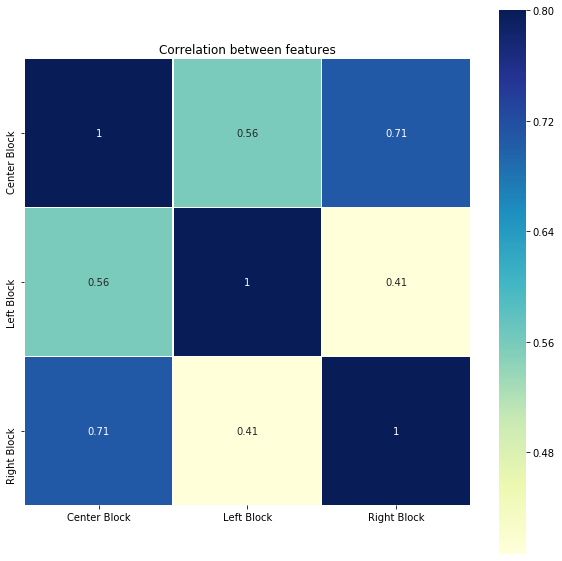

In [86]:
filteredDF = dat[["Center Block","Left Block", "Right Block"]]
corrMatrix = filteredDF.corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## ניתוח
<br>
אפשר לראות שישנה קורלציה יותר חזקה בין גוש הימין לבין גוש המרכז (מעל 0.5) אבל היא יותר חלשה עם גוש השמאל 0.41

## Scatter matrix between : "Center Block","Left Block", "Right Block"

<Figure size 720x720 with 0 Axes>

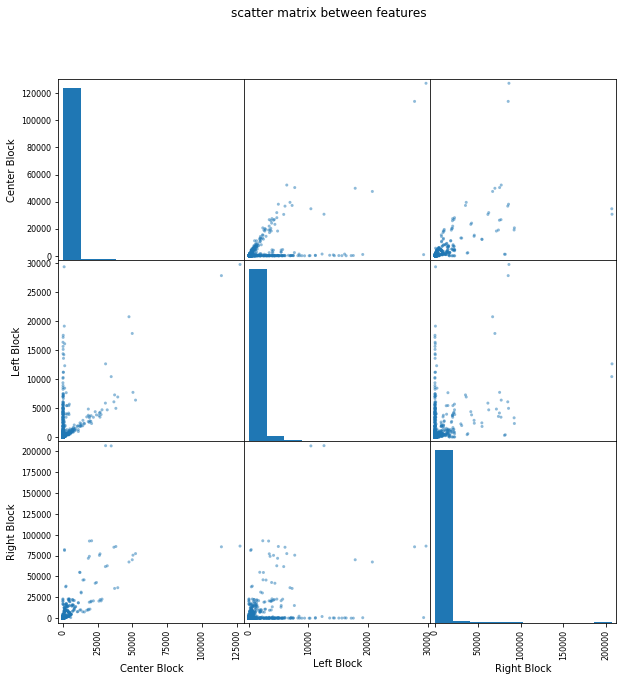

In [87]:
fig = plt.figure(figsize=(10,10))
pd.plotting.scatter_matrix(filteredDF,figsize=(10, 10),alpha=0.5)
plt.suptitle('scatter matrix between features');

## ניתוח
אני לא מבין איך לנתח גרף זה! כשאת משווה משבצת מול משבצת מה את יכולה לראות?

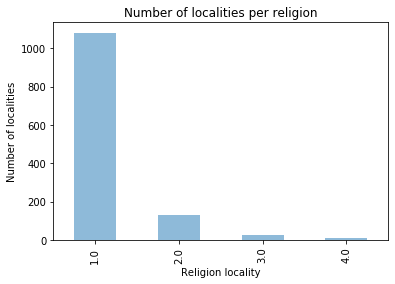

In [58]:
bycode2018_df = pd.read_excel("datasets/bycode2018.xlsx", usecols=[1, 8]) # עמודות: סמל ישוב + דת יישוב 
bycode2018_df.head()
bycode2018_df['דת יישוב'].value_counts().plot(kind="bar",alpha=0.5)

fig = plt.figure(figsize=(6.4,4.8))
plt.xlabel('Religion locality')
plt.ylabel('Number of localities')
plt.title('Number of localities per religion')
plt.show()

מה אמור להראות גרף זה?